In [ ]:
import os
import git
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True
RERUN=False
plots_path = os.path.join(ROOT_DIR, "publication", "poster", "plots")
from scipy.spatial import Delaunay


In [2]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
from reporting import *

main_df = main_df.copy()
main_df_all = main_df.copy()
main_df = main_df[main_df["failure_type"] == "pass"]
main_df["orientation"] = main_df["orientation"].fillna("fourier")
np.random.seed(0)

In [3]:
def in_hull(p, hull):
    if hasattr(hull, 'vertices') and not isinstance(hull, Delaunay):
        hull = Delaunay(hull.points)
    elif not isinstance(hull, Delaunay):
        hull = Delaunay(hull)
    return hull.find_simplex(p) >= 0

def get_hull_centroid(hull, log =False):
    # Extract ordered convex hull vertices
    polygon = hull.points[hull.vertices]
    if log:
        polygon = np.log10(polygon)

    # Close the polygon if needed
    if not np.allclose(polygon[0], polygon[-1]):
        polygon = np.vstack([polygon, polygon[0]])

    x, y = polygon[:, 0], polygon[:, 1]
    cross = x[:-1] * y[1:] - x[1:] * y[:-1]
    area = 0.5 * np.sum(cross)

    if np.isclose(area, 0):
        return np.mean(polygon, axis=0)  # fallback for degenerate polygon

    cx = np.sum((x[:-1] + x[1:]) * cross) / (6 * area)
    cy = np.sum((y[:-1] + y[1:]) * cross) / (6 * area)

    return np.array([cx, cy])
def in_hull_list(p, hulls):
   return np.any([in_hull(p, hull) for hull in hulls], axis=0)

In [4]:
csv_path = Path(os.path.join(ROOT_DIR, 'publication', 'poster', 'CSVs', 'quick_access.csv'))

def in_hull(p, hull):
    if hasattr(hull, 'vertices') and not isinstance(hull, Delaunay):
        hull = Delaunay(hull.points)
    elif not isinstance(hull, Delaunay):
        hull = Delaunay(hull)
    return (hull.find_simplex(p) >= 0)

if RERUN or not csv_path.exists():
    x_vals = np.linspace(0, 20, 1000)
    eta_vals = 1.5 + np.zeros_like(x_vals)
    roi_beta = (eta_vals) / x_vals
    roi = 1 / roi_beta
    def line_intersects_hull(hull):
        if hull is None or hull is np.nan:
            return False
        line_points = np.column_stack((x_vals, roi))
        return np.any(in_hull(line_points, hull))

    main_df['intersect_roi'] = main_df['hull'].apply(lambda h: line_intersects_hull(h) if type(h) != str else False)
    main_df.drop('hull', axis=1).to_csv(csv_path)

main_df = pd.read_csv(csv_path).drop('Unnamed: 0', axis=1)
main_df['intersect_roi'] = (main_df['intersect_roi'] == 'True').astype(int)
main_df.head()


C:\Users\yashd\AppData\Local\Temp\ipykernel_39188\854665432.py:3: RuntimeWarning: divide by zero encountered in divide
  roi_beta = (eta_vals) / x_vals


,group,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,...,dataset_type,hull,best_beta,best_1/beta,beat_all_priors,best_prior,failure_category,failure_type,which_ones,intersect_roi
0,2,1292.946700,749.107670,2108.430700,421.841550,123.974430,696.238040,45000.0,0.1,2.5,...,remote sensing,<scipy.spatial._qhull.ConvexHull object at 0x0...,38.000000,0.026316,1,GenGamma,practically_pass,pass,NaN,True
1,5,662.654400,382.089750,1248.617800,628.030000,108.212240,1663.239500,117000.0,0.1,2.0,...,remote sensing,<scipy.spatial._qhull.ConvexHull object at 0x0...,43.333333,0.023077,1,GenGamma,practically_pass,pass,NaN,False
2,8,256.633900,133.792040,650.845600,1363.730700,99.365600,3639.235800,189000.0,0.1,2.9,...,remote sensing,<scipy.spatial._qhull.ConvexHull object at 0x0...,53.333333,0.018750,1,GenGamma,practically_pass,pass,NaN,True
3,11,121.961570,57.215298,390.192930,2698.317600,93.680930,4889.278000,495000.0,0.1,3.1,...,remote sensing,<scipy.spatial._qhull.ConvexHull object at 0x0...,55.555556,0.018000,1,GenGamma,practically_pass,pass,NaN,True
4,14,48.468010,23.179575,151.679550,2654.295200,86.305040,4711.629400,1134000.0,0.1,3.4,...,remote sensing,<scipy.spatial._qhull.ConvexHull object at 0x0...,56.666667,0.017647,1,GenGamma,practically_pass,pass,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,4,241418.060000,225806.880000,257381.550000,4.450259,4.034465,4.879806,22538.0,0.5,-0.5,...,medical,<scipy.spatial._qhull.ConvexHull object at 0x0...,1.400000,0.714286,1,GenGamma,actually_pass,pass,NaN,False
1151,5,33947.695000,31871.596000,36147.625000,3.966855,3.001096,5.099455,296776.0,0.1,8.6,...,medical,<scipy.spatial._qhull.ConvexHull object at 0x0...,101.000000,0.009901,1,GenGamma,actually_pass,pass,NaN,True
1152,6,6416.669400,5792.756300,7090.980500,13.477583,10.768813,16.435010,2880648.0,0.1,4.2,...,medical,<scipy.spatial._qhull.ConvexHull object at 0x0...,56.000000,0.017857,1,GenGamma,practically_pass,pass,NaN,True
1153,7,397.892600,357.501070,450.380680,17.566162,9.929181,54.616486,25362406.0,0.1,2.2,...,medical,<scipy.spatial._qhull.ConvexHull object at 0x0...,37.000000,0.027027,1,GenGamma,practically_pass,pass,NaN,True


# Medical

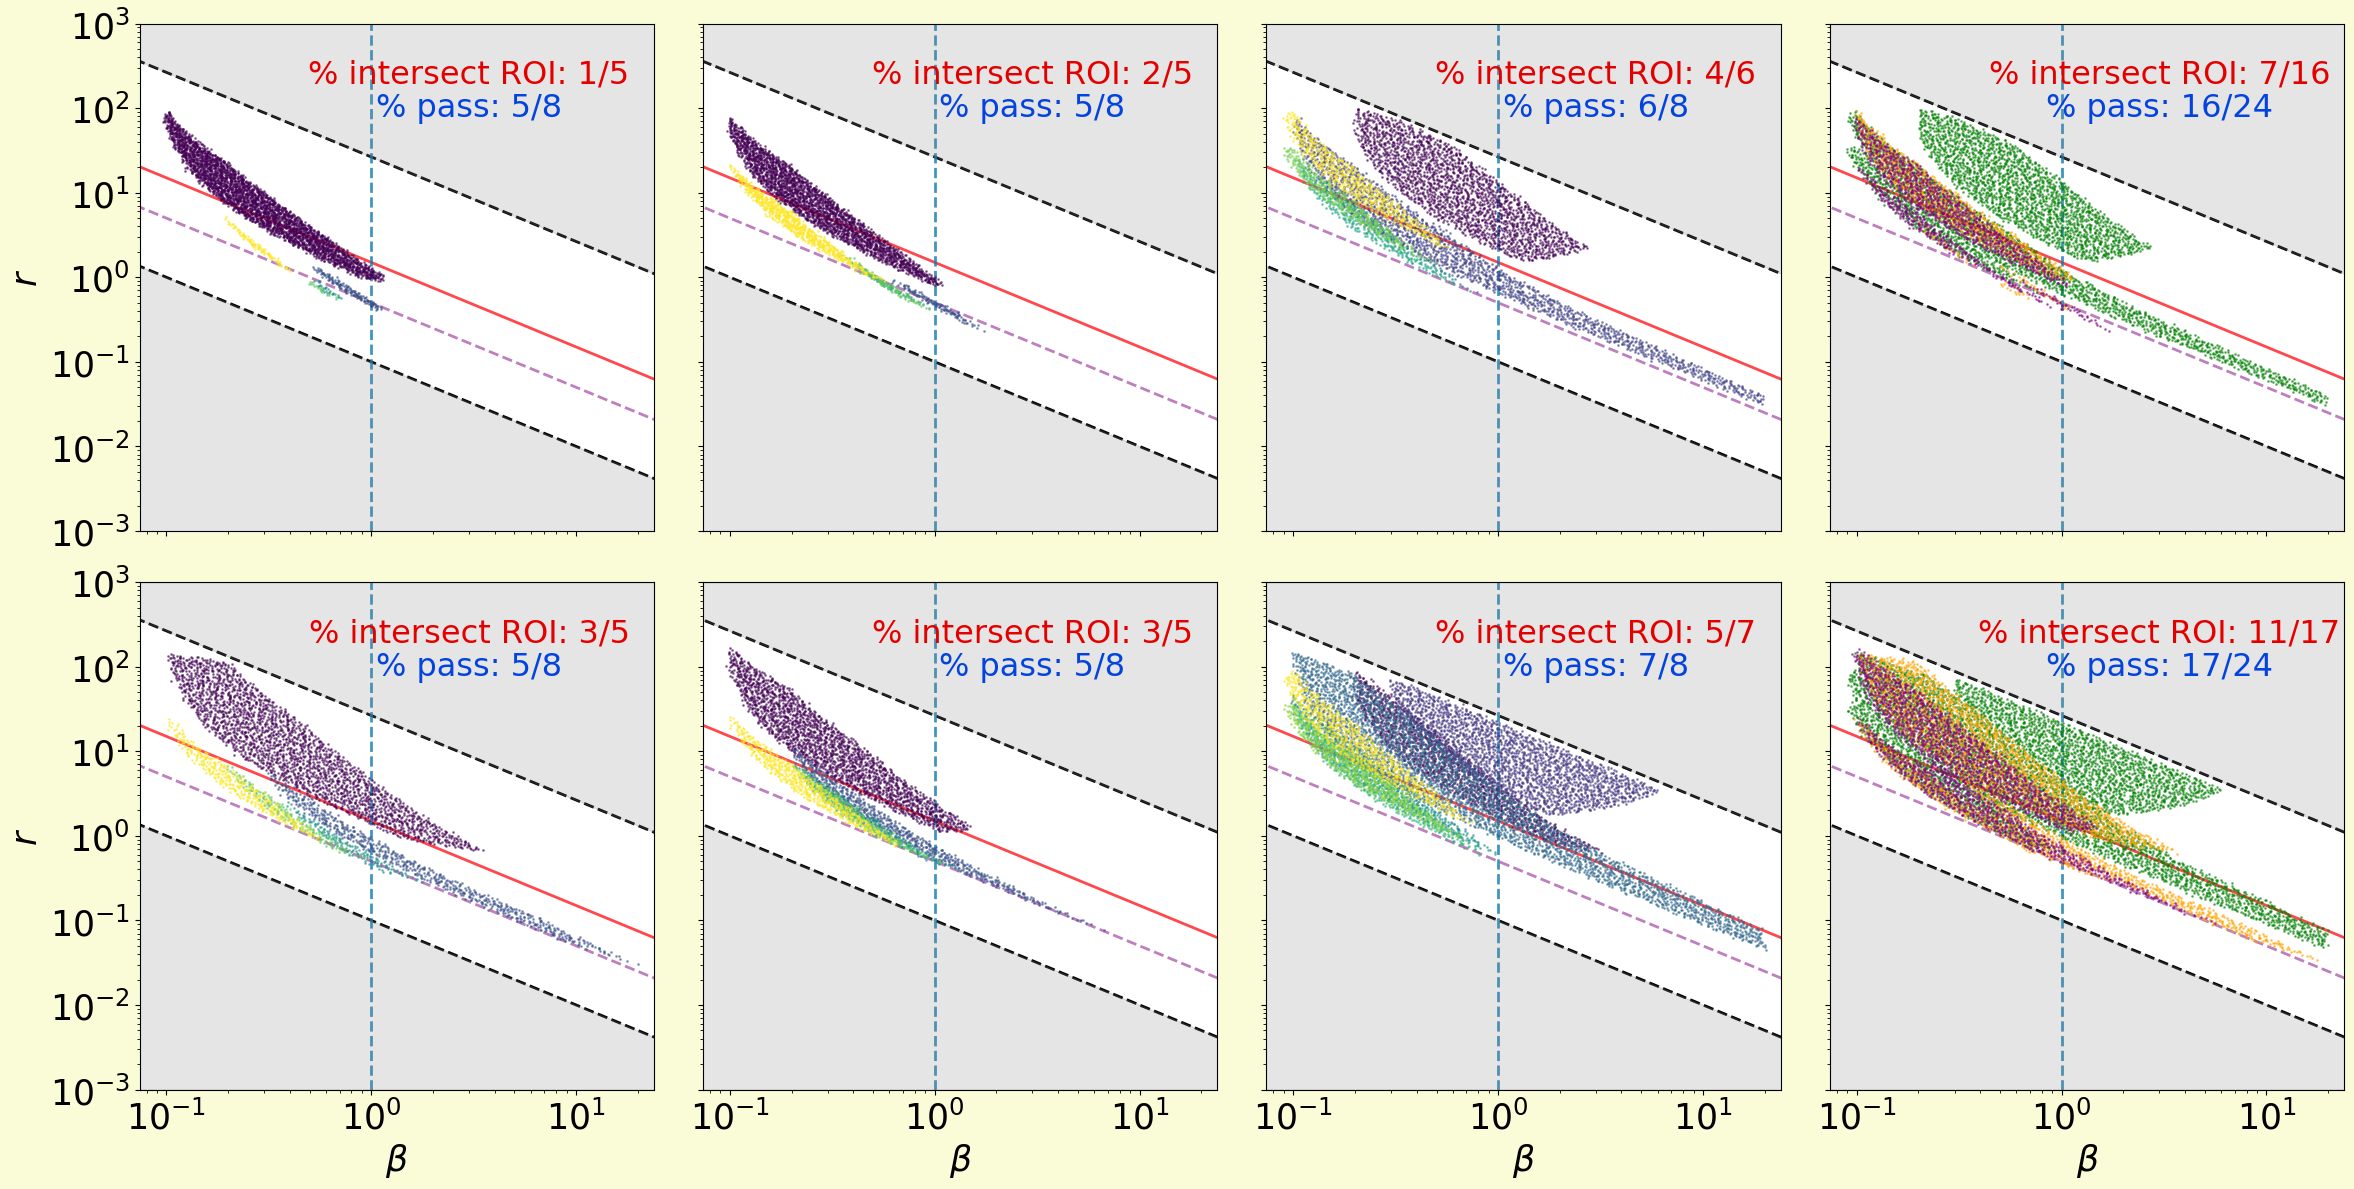

In [5]:
num_points = 150
JITTER_FACTOR = 50
size = 1
datasets = [("syntheticMRI2D", "axial"), ("syntheticMRI2D", "coronal")]#, ("syntheticMRI2D", "sagittal")]
directions = ["horizontal", "vertical", "diagonal"]
fontsize=25

# Add a fourth column to the right for the new plots
fig, axes = plt.subplots(len(datasets), 4, figsize=(24, 12), sharex=True, sharey=True)
fig.patch.set_facecolor('#F9FCD6')
global_xmax = 0
global_ymax = 0
global_xmin = np.inf
global_ymin = np.inf
for i, DATASET in enumerate(datasets):
    num_pass_overall = 0
    num_intersect_overall = 0
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        df = main_df[(main_df["dataset"] == DATASET[0]) & (main_df["subset"] == DATASET[1]) & (main_df["transform"] != "learned") & (main_df["orientation"] == direction)].copy()
        df = df.dropna(subset=["hull"])
        df["best_1/beta"] = 1 / df["best_beta"]
        df_all = main_df_all[(main_df_all["dataset"] == DATASET[0]) & (main_df_all["subset"] == DATASET[1]) & (main_df_all["transform"] != "learned") & (main_df_all["orientation"] == direction)].copy()
        
        group_list = df["group"].unique()
        hull_list = []
        all_hulls = []
        for group in group_list:
            hull_list.append(df[df["group"] == group]["hull"])
            all_hulls.extend(df[df["group"] == group]["hull"])
        if len(all_hulls) == 0:
            continue
        all_points = np.vstack([hull.points for hull in all_hulls])
        xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
        ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()

        if xmax > global_xmax:
            global_xmax = xmax
        if ymax > global_ymax:
            global_ymax = ymax
        if xmin < global_xmin:
            global_xmin = xmin
        if ymin < global_ymin:
            global_ymin = ymin
            
        color_map = plt.get_cmap('viridis')
        num_groups = len(group_list)
        group_colors = {group: color_map(idx / max(num_groups - 1, 1)) for idx, group in enumerate(group_list)}
        x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
        y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
        
        xx, yy = np.meshgrid(x_vals, y_vals)
        points_grid = np.c_[xx.ravel(), yy.ravel()]
        for k, hull in enumerate(hull_list):
            hull_mask = in_hull_list(points_grid, hull)
            points = points_grid[hull_mask]
            points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
            ax.scatter(points[:, 0], 1/points[:, 1], s=size, label=group_list[k], alpha=0.5, color=group_colors[group_list[k]])
        ax.set_xscale('log')
        ax.set_yscale('log')
        temp_df = df[df["orientation"] == direction]

        pass_percent = f"{len(temp_df)}/{len(df_all)}"
        intersect_percent = f"{sum(df['intersect_roi'])}/{len(temp_df)}"

        ax.annotate(f"% intersect ROI: {intersect_percent}", xy=(3, 200), 
            textcoords='data', color='xkcd:red', fontsize=fontsize-2, ha='center', 
            bbox=dict(facecolor='none', edgecolor='none', pad=0.5))
        ax.annotate(f"% pass: {pass_percent}", xy=(3, 80), 
            textcoords='data', color='xkcd:blue', fontsize=fontsize-2, ha='center', 
            bbox=dict(facecolor='none', edgecolor='none', pad=0.5))


    # Fourth column: plot by orientation for each DATASET
    ax4 = axes[i, 3]
    df = main_df[(main_df["dataset"] == DATASET[0]) & (main_df["subset"] == DATASET[1]) & (main_df["transform"] != "learned")].copy()
    df = df.dropna(subset=["hull"])
    df["best_1/beta"] = 1 / df["best_beta"]
    if df["dataset_type"].unique()[0] == "remote sensing":
        df["orientation"] = df["orientation"].fillna("fourier")
    df_all = main_df_all[(main_df_all["dataset"] == DATASET[0]) & (main_df_all["subset"] == DATASET[1]) & (main_df_all["transform"] != "learned")].copy()
        
    orientation_list = df["orientation"].unique()
    hull_list = []
    all_hulls = []
    for orientation in orientation_list:
        hull_list.append(df[df["orientation"] == orientation]["hull"])
        all_hulls.extend(df[df["orientation"] == orientation]["hull"])
    if len(all_hulls) == 0:
        continue
    all_points = np.vstack([hull.points for hull in all_hulls])
    xmin, xmax = all_points[:, 0].min(), all_points[:, 0].max()
    ymin, ymax = all_points[:, 1].min(), all_points[:, 1].max()
    orientation_colors = {"horizVert": "blue", "diagonal": "green", "fourier": "orange", "vertical": "purple", "horizontal": "orange"}
    x_vals = np.logspace(np.log10(xmin), np.log10(xmax), num_points)
    y_vals = np.logspace(np.log10(ymin), np.log10(ymax), num_points)
    
    xx, yy = np.meshgrid(x_vals, y_vals)
    points_grid = np.c_[xx.ravel(), yy.ravel()]
    for k, hull in enumerate(hull_list):
        hull_mask = in_hull_list(points_grid, hull)
        points = points_grid[hull_mask]
        points = points + np.random.normal(scale=points / JITTER_FACTOR, size=points.shape)
        ax4.scatter(points[:, 0], 1/points[:, 1], s=size, label=orientation_list[k], alpha=0.5, color=orientation_colors[orientation_list[k]])
    ax4.set_xscale('log')
    ax4.set_yscale('log')

    temp_df = df

    pass_percent = f"{len(temp_df)}/{len(df_all)}"
    intersect_percent = f"{sum(df['intersect_roi'])}/{len(temp_df)}"

    ax4.annotate(f"% intersect ROI: {intersect_percent}", xy=(3, 200), 
            textcoords='data', color='xkcd:red', fontsize=fontsize-2, ha='center', 
            bbox=dict(facecolor='none', edgecolor='none', pad=0.5))
    ax4.annotate(f"% pass: {pass_percent}", xy=(3, 80), 
        textcoords='data', color='xkcd:blue', fontsize=fontsize-2, ha='center', 
        bbox=dict(facecolor='none', edgecolor='none', pad=0.5))
    
    ax4.legend(fontsize=fontsize).set_visible(False)

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i, j]
        x_vals_global = np.logspace(np.log10(global_xmin) -1 , np.log10(global_xmax+1) + 1, num_points)
        eta_vals_global = 0 * np.zeros_like(x_vals_global)
        eta_roi_lower = -0.1 * np.zeros_like(x_vals_global)
        eta_roi_upper = 0.1 * np.zeros_like(x_vals_global)
        eta_20_vals_global = 25 + np.zeros_like(x_vals_global)
        eta_lower_global = -1.4 + np.zeros_like(x_vals_global)
        eta_neg_1 = -1 + np.zeros_like(x_vals_global)
        
        roi_global = (eta_vals_global + 1.5) / x_vals_global
        roi_lower = (eta_roi_lower + 1.5) / x_vals_global
        roi_upper = (eta_roi_upper + 1.5) / x_vals_global
        beta_20_global = (eta_20_vals_global + 1.5) / x_vals_global
        beta_lower_global = (eta_lower_global + 1.5) / x_vals_global
        beta_neg_1_global = (eta_neg_1 + 1.5) / x_vals_global
        
        ax.plot(x_vals_global, roi_global, color='xkcd:light red', linestyle='-', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_20_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_lower_global, color='black', linestyle='--', label='ROI', zorder=0, linewidth=2)
        ax.plot(x_vals_global, beta_neg_1_global, color='purple', linestyle='--', label='ROI', zorder=0, linewidth=2, alpha=0.5)
        ax.axvline(x=1, color='xkcd:nice blue', linestyle='--', label='r=1', zorder=0, linewidth=2, alpha=0.8)

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.fill_between(x_vals_global, ylim[0], beta_lower_global, color='gray', alpha=0.2)
        ax.fill_between(x_vals_global, ylim[1], beta_20_global, color='gray', alpha=0.2)

        # ax.set_xlabel("r")
        # ax.set_ylabel("beta")
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(global_xmin/1.2, global_xmax*1.2)
        ax.set_ylim((1e-3, 1e3))
        #ax.set_ylim(global_ymin, global_ymax)

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i, j]
        if j == 0:
            ax.set_ylabel(r"$r$", fontsize=fontsize)
            ax.tick_params(axis='both', which='major', labelsize=fontsize)
        else:
            ax.set_ylabel("")
        
        if i == 1:
            ax.set_xlabel(r"$\beta$", fontsize=fontsize)
            ax.tick_params(axis='both', which='major', labelsize=fontsize)
        else:
            ax.set_xlabel("")
            # Set common titles for the top row and leftmost column
        # for j, direction in enumerate(np.append(directions, 'combined')):
        #     axes[0, j].set_title(direction.capitalize(), fontsize=fontsize)

        # for i, DATASET in enumerate(datasets):
        #     axes[i, 0].set_ylabel(DATASET[0].capitalize() + "\n" + r"$r$", fontsize=fontsize, rotation=90, labelpad=10)

       
plt.tight_layout()
plt.show()

    
if SAVE_FIGS:
    fig.savefig(os.path.join(plots_path, "region_pointalism_medical.png"), bbox_inches='tight', dpi=1000)

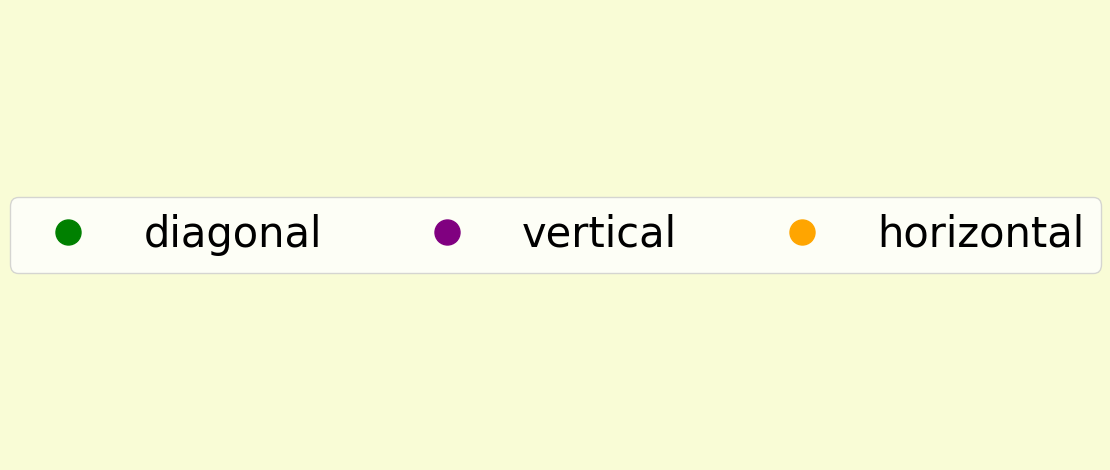

In [6]:
# Update the dictionary defining your legend items and their colors
legend_data = {
    "diagonal": "green",
    "vertical": "purple",
    "horizontal": "orange",
    # "Num. of regions\nthat intersect ROI": "white",
    # "Num. of layers\nthat pass": "white" 
}

# Create a list of Line2D objects, one for each legend entry
legend_handles = [Line2D([0], [0], color=color, marker='o', linestyle='None', label=label) for label, color in legend_data.items()]

# Create a blank figure
fig, ax = plt.subplots()
fig.patch.set_facecolor('#F9FCD6')
ax.axis('off')  # Turn off the axes

# Add the legend to the figure with reduced whitespace
ax.legend(handles=legend_handles, loc='center', fontsize=30, markerscale=3, ncol=len(legend_data))  # Adjust bbox_to_anchor to control spacing

# legend = ax.get_legend()
# for text in legend.get_texts():
#     if text.get_text() == sorted(legend_data)[1]:
#         text.set_color("red")
#     elif text.get_text() == sorted(legend_data)[0]:
#         text.set_color("blue")

# Display the legend
plt.tight_layout()
plt.show()

if SAVE_FIGS:
    legend_save_path = os.path.join(plots_path, "region_reporting_legend.jpg")
    fig.savefig(legend_save_path, dpi=600, bbox_inches='tight')